In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
df=pd.read_csv("D:/GL/formations/gomycode/CC GENERAL.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [26]:
data=df.drop(columns="CUST_ID")

In [27]:
x=data[['CREDIT_LIMIT','PAYMENTS']]

In [68]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
clust_labels=model.fit_predict(x)
agglomerative=pd.DataFrame(clust_labels)

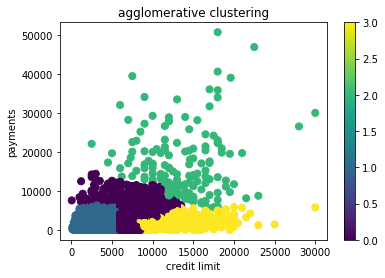

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(x['CREDIT_LIMIT'],x['PAYMENTS'],c=agglomerative[0],s=50)
ax.set_title('agglomerative clustering')
ax.set_xlabel('credit limit')
ax.set_ylabel('payments')
plt.colorbar(scatter)

In [52]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(x)
labels=pd.DataFrame(kmeans.labels_)

<class 'sklearn.cluster.k_means_.KMeans'>


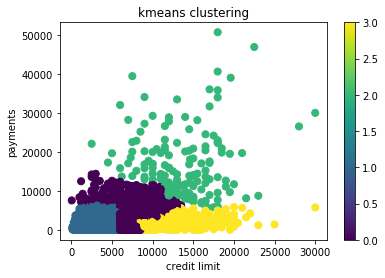

In [65]:
kmeans.predict(x)
print(type(kmeans))
centroids=kmeans.cluster_centers_
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(x['CREDIT_LIMIT'],x['PAYMENTS'],c=agglomerative[0],s=50)
ax.set_title('kmeans clustering')
ax.set_xlabel('credit limit')
ax.set_ylabel('payments')
plt.colorbar(scatter)


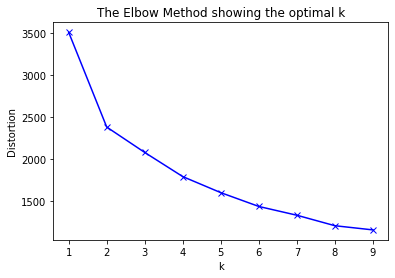

In [66]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
K=range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()